# FMCG Object Detection

The following steps were taken during the project:

1. Data Visualization
2. TF Record Generation
3. Training
4. Inference (on Test set)
5. Metric Evaluation
6. Results visialization

# Visualizing the images

In [4]:
from fmcg_data_loading import Process_Dataset

In [5]:
path_tr_img = 'ShelfImages/train'
path_ts_img = 'ShelfImages/test'
path_metadata = 'grocerydataset/annotation.txt'


load_tr = Process_Dataset(path_tr_img, path_metadata)
load_ts = Process_Dataset(path_ts_img, path_metadata)

  1%|          | 2/283 [00:00<00:17, 16.41it/s]

Loading Images ...


  3%|▎         | 2/71 [00:00<00:05, 11.77it/s]

Loading Images ...


100%|██████████| 71/71 [00:04<00:00, 15.80it/s]


<Figure size 864x576 with 0 Axes>

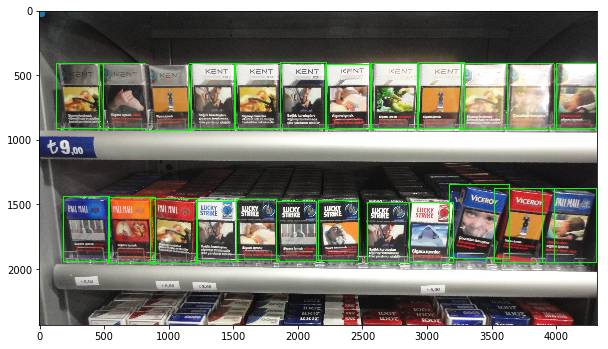

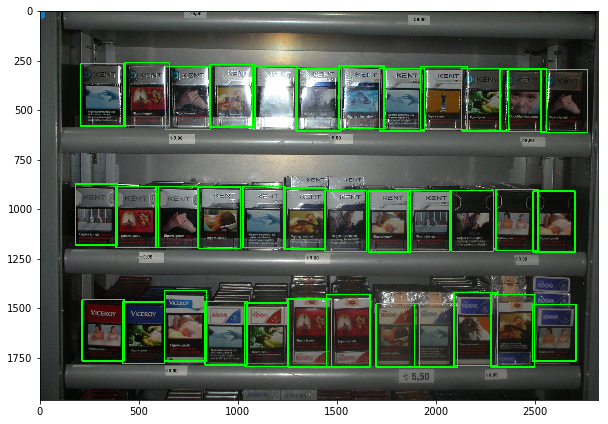

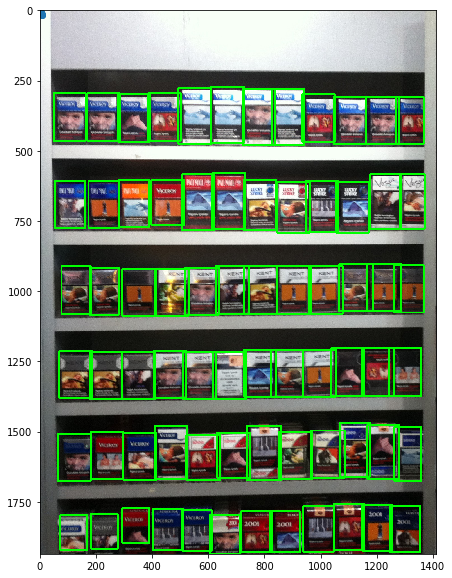

In [6]:
load_tr.view(view_box = True, zoom = 2, no_views = 3)

<Figure size 864x576 with 0 Axes>

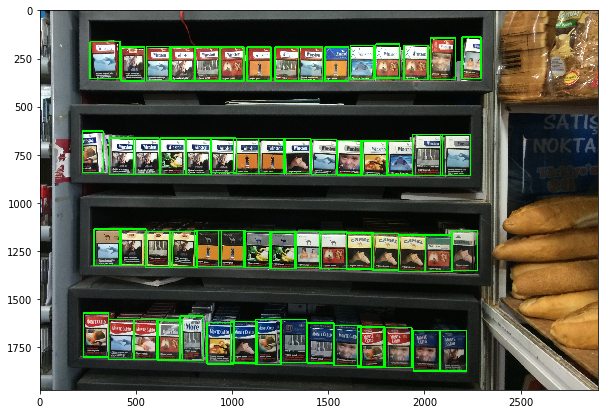

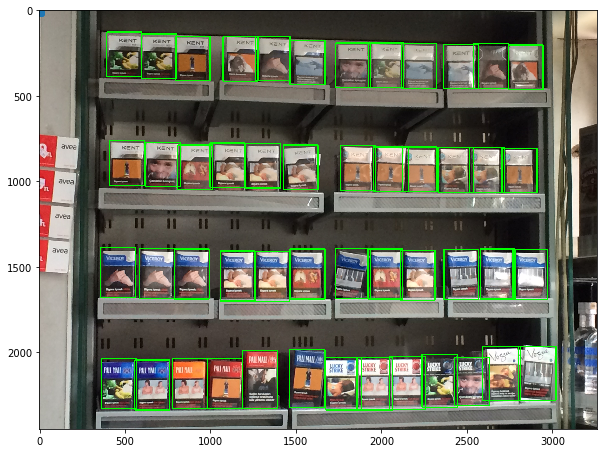

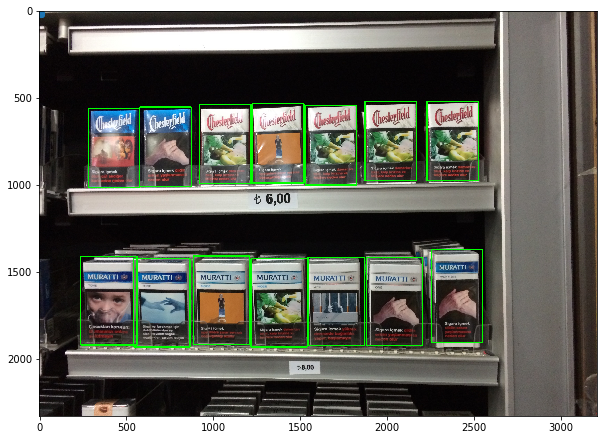

In [7]:
load_ts.view(view_box = True, zoom = 2, no_views = 3)

# Generating TF Records

In [8]:
load_tr.save_csv_for_tfrecords('train')

Please find the file in csv_for_tfrecords folder


In [9]:
load_ts.save_csv_for_tfrecords('test')

Please find the file in csv_for_tfrecords folder


Generating tfrecords

In [10]:
!python generate_tfrecord.py --csv_input=csv_for_tfrecords/train.csv  --output_path=csv_for_tfrecords/train.record 
!python generate_tfrecord.py --csv_input=csv_for_tfrecords/test.csv  --output_path=csv_for_tfrecords/test.record 
# ran in terminal with the virtual environment

Traceback (most recent call last):
  File "generate_tfrecord.py", line 20, in <module>
    from object_detection.utils import dataset_util
ModuleNotFoundError: No module named 'object_detection'


# Training

1. trained using tensorflow object detection api
2. followed the procedure https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html
3. The model used was ssd_inception_v2_coco
4. Trained for 27000+ steps which took 12+ hours on rtx 2080 ti
5. ran eval.py and got surprised to see mAP = 99%

6. Got unsure about it and checked on github if anyone has prepared this metric, found a solution which I will discuss later.

# Inference - on Test Set

I prepared a script which uses the trained model and runs inference on the test set. I even saved the results in the json file (you can call it raw results)

The inference file is SSD_Detector.py

In [ ]:
# Files not at proper paths, thus will not run here
from SSD_Detector import DetectionObj
import os

In [ ]:
detection = DetectionObj()
inference_path = 'inference'
target_folder_json = 'output_json'
target_folder_image = 'output_image'
images = get_inference_images_list(inference_path)
detection.file_pipeline(images, inference_path, target_folder_json, target_folder_image)

This script saves all prediction information(boxes, confidence, class) in a json format and all the annotated images

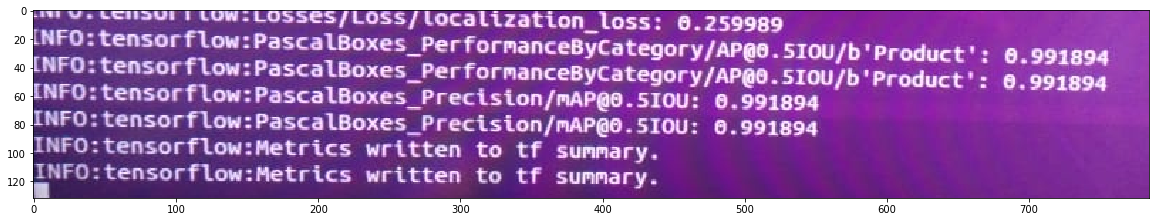

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.imshow(plt.imread('results/tf_api_eval.png'))

# Evaluating metric (mAP)

I pulled a repo from github that calculates mAP metric. I would like to thank this person for helping me

link https://github.com/rafaelpadilla/Object-Detection-Metrics.git

I had to process the data according to the prescribed format, the below scrip does that and saves at the prescribed location

In [1]:
test_list_path = 'ShelfImages/test'
json_path = 'output_json'
csv_path = 'csv_for_tfrecords'
from create_results import process_results
results_ssd_inception = process_results(test_list_path,json_path,csv_path)
results_ssd_inception.save_metric_format()

By running 'python pascalvoc.py -t 0.50' through terminal showed a graph

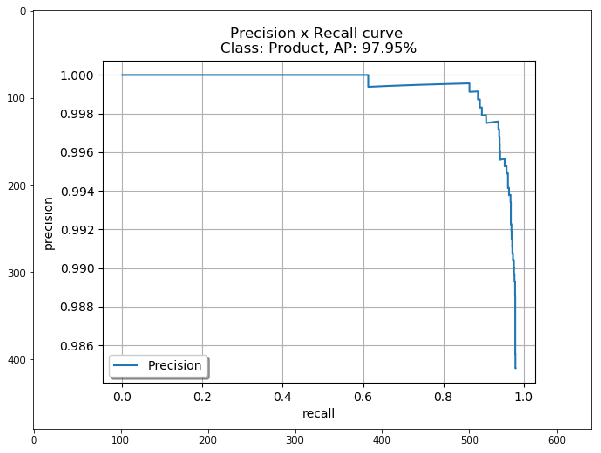

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(plt.imread('results/Product.png'))

I still can't believe I did a great job. So I thought I should check by placing the bounding boxes and check

# Results Visualization

I saved predicted image files using object_detection api but I created my own visualization as to varify the results myself

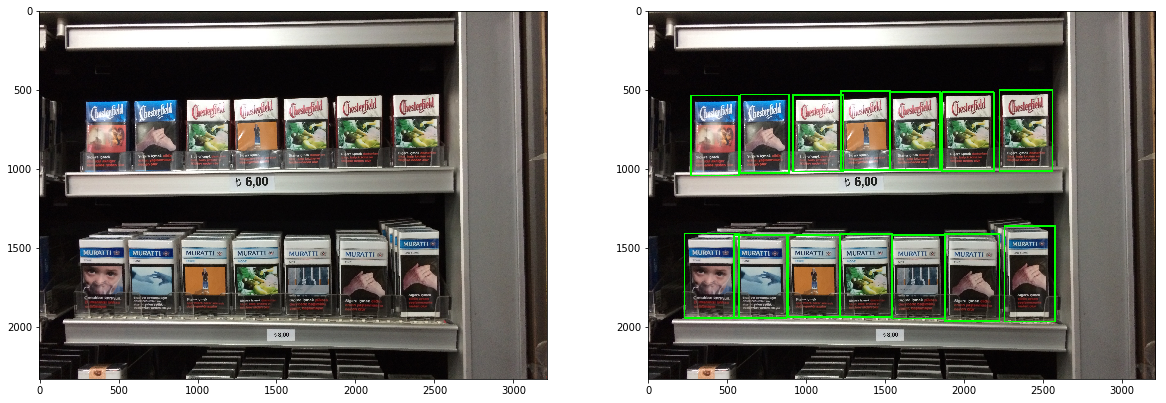

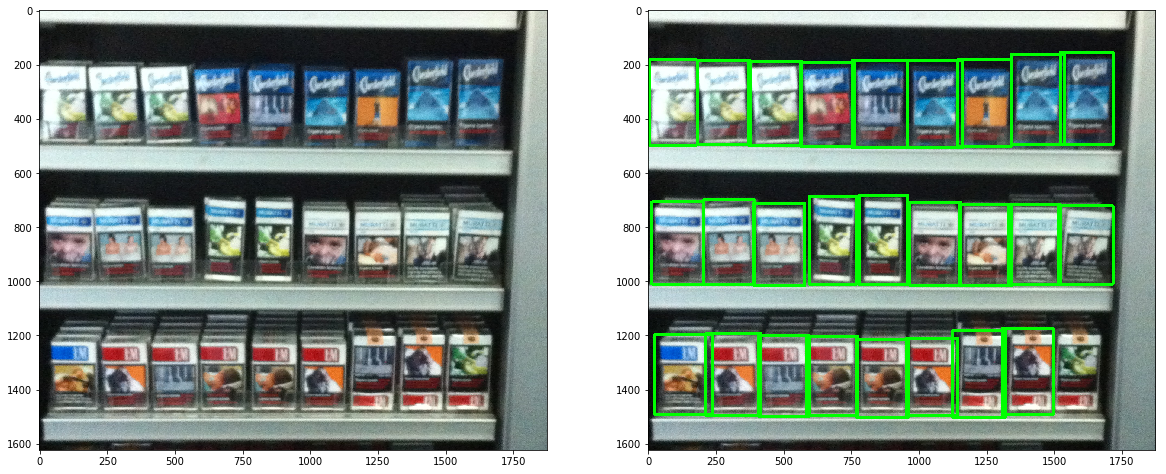

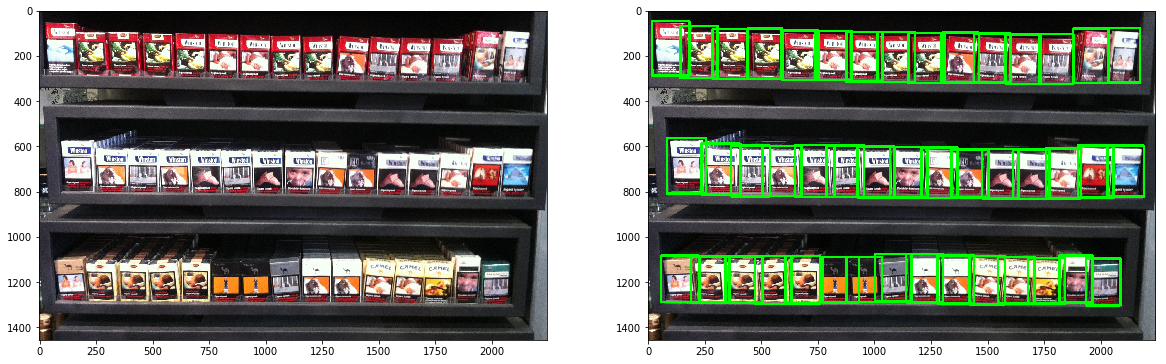

In [2]:
results_ssd_inception.compare_images(no_views = 3)

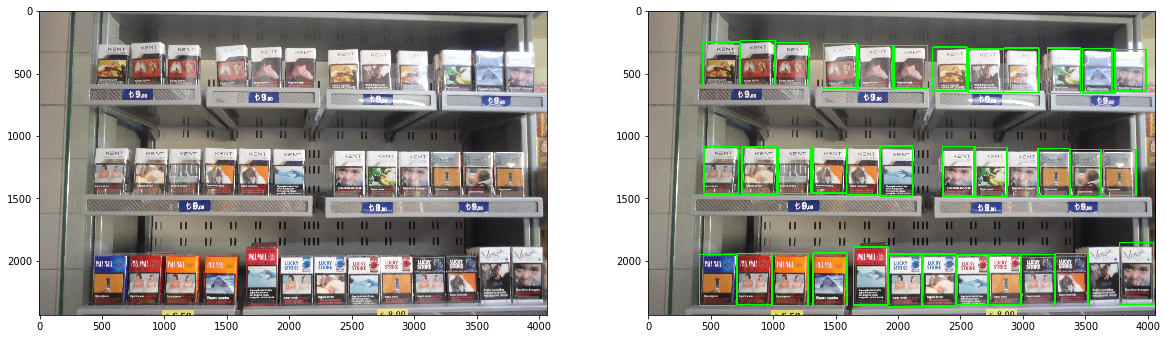

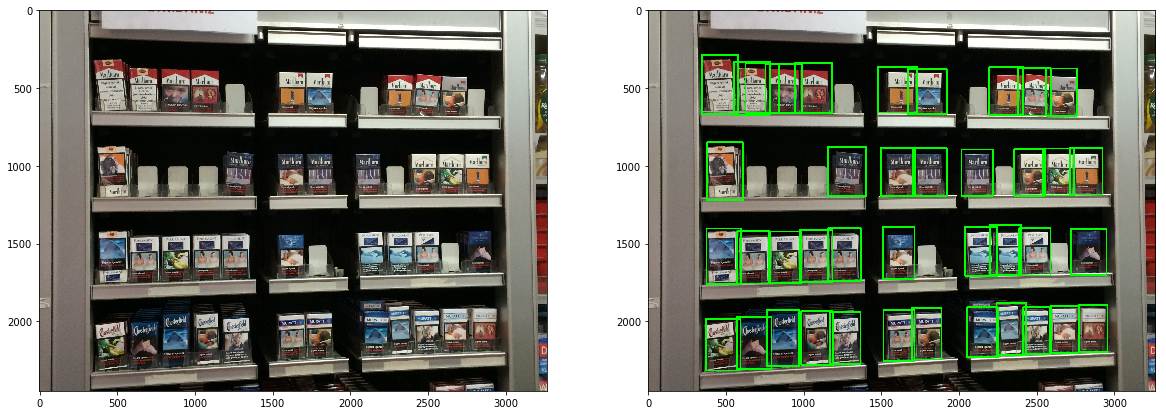

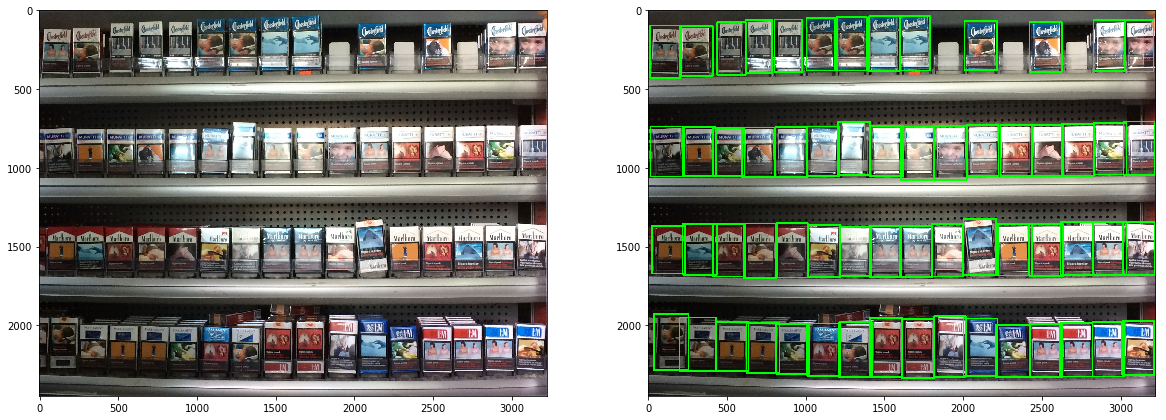

In [3]:
results_ssd_inception.compare_images(no_views = 3)

I guess the model is trained very well. Although I can see some errors but I guess it can be managed. It can also be over-fitting.

I believe I can code it in a better way, I mean with configuations and less of hard-coded stuff which can be integrated with the backend (Django or Flask)

In [4]:
from create_results import count_boxes
test_list_path = 'ShelfImages/test'
dict_ = count_boxes(test_list_path).compute_results()